In [1]:
# load in the correct modules
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from astropy.io import fits


In [5]:
# load in the Harris GC catalogue
harris_gc = fits.open('/Users/qpasa/Desktop/n-rich-halo/sav/harris+baumgardt.fits')
data_gc = harris_gc[1].data

# get the data
names_gc = data_gc.field('Name') #gc name
fe_h_gc = data_gc.field('[Fe/H]')#gc metallicity from Harris
vlos_gc = data_gc.field('rad_vel') #gc radial velocity from Baumgardt
rc_gc = data_gc.field('rc') #gc core radius from Baumgardt
rt_gc = data_gc.field('rt') #gc tidal radius from Baumgardt
glon_gc = data_gc.field('l') #gc longitude from Harris
glat_gc = data_gc.field('b') #gc latitude from Harris
rsun_gc = data_gc.field('R_sun(kpc)') #gc longitude from Harris
vlos_disp_gc = data_gc.field('v_disp') #gc velocity dispersion from Baumgardt
pmra_gc = data_gc.field('pmra')#gc pmra from Baumgardt
pmdec_gc = data_gc.field('pmdec')#gc pmdec from Baumgardt
pmra_gc_err = data_gc.field('pmra_err')#gc pmra error from Baumgardt
pmdec_gc_err = data_gc.field('pmdec_err')#gc pmdec error from Baumgardt


In [24]:
rsun_gc = np.asarray(rsun_gc,dtype=float) 
rsun_gc = rsun_gc*1000 #transform distance into parsecs
print(rsun_gc)

[  4430.   9980.   9170.  31300.  15490.  11000. 123300.  90100.  27200.
  11330.  13270.  10800.  83180.  39400.  10210.   8090.  92500.   4600.
 103000.  18200.   5760.  21200.  10130.   6240.  17900.  17200.   5240.
   9590.  11450.  32200.  16900.  27200.  37330.  18200.  31800.  23200.
  12600.   7570.   9080.  10600.  10560.  71000.   8000.   8860.   1930.
  16070.   8900.   9800.   8100.   6030.   6770.  30620.   4670.   9800.
  13520.   4960.   6400.  45100.   6410.   8270.  15140.   9400.   9800.
   5770.  11600.   8440.   7800.   8400.   8430.  15100.   8700.   5890.
  25000.   7500.   3660.   6700.   6800.   7360.   8100.   9800.   6700.
   6400.  10740.   9310.   7700.   2440.   5800.  35300.  13700.   5500.
   8240.  11830.   6700.  11600.   7800.  11300.   7100.  10600.   5800.
   6500.   7450.   7850.   5200.   2600.   7950.   6750.   7200.   5390.
  10590.   6500.  13180.   6400.   5430.  10320.   8800.   8050.  10000.
   3230.  12800.   9310.   6950.  24130.   7100.   

In [25]:
rt_degrees = np.tan(rt_gc/rsun_gc)*180/np.pi
print(rt_degrees) #now we have tidal radius in degrees

[1.54347914 0.56574245 0.68970703 0.06981668 0.45164361 0.13381193
 0.14449441 0.0880804  0.45635368 0.59558401 0.47487071 0.45895963
 0.51110871 0.16560562 0.87678923 0.14908267 0.11330332 0.89288999
 0.13595257 0.26063464 0.76150179 0.21742771 0.43343131 0.66719547
 0.50229519 0.29187789 2.16317726 0.72295696 0.53654438 0.19962856
 0.26491858 0.38487756 0.34038668 0.33159516 0.4930802  0.1501548
 0.32677138 0.59863777 0.39041241 0.31361645 0.33981788 0.07830966
 0.30452994 0.31842814 1.51616856 0.33857315 0.17845439 0.30700307
 0.18087135 0.35546644 1.05226175 0.3712489  0.51493976 0.15925929
 0.3832772  0.61167879 0.25720606 0.13954281 0.44085547 0.27989939
 0.25374553 0.16268388 0.13528845 0.33881364 0.29971893 0.76444164
 0.13192743 0.3038751  0.12628201 0.33990836 0.11544786 0.29815475
 0.2861375  0.06921334 0.59301685 0.11912409 0.18452675 0.38457257
 0.18978412 0.32249679 0.14101631 0.18030325 0.45666876 0.51967652
 0.12694384 1.18929299 0.32935558 0.24221813 0.74748049 0.39732

In [6]:
harris = fits.open('/Users/qpasa/Desktop/n-rich-halo/sav/harris2010.fits')
data_h = harris[1].data

names_h = data_h.field('ID') #gc name


In [27]:
print(names_gc[53])
mask_fsr1753 = fe_h_gc!='-9999'
print(mask_fsr1753)

names_gc = names_gc[mask_fsr1753]
fe_h_gc = fe_h_gc[mask_fsr1753]
vlos_gc = vlos_gc[mask_fsr1753]
rc_gc = rc_gc[mask_fsr1753]
rt_gc = rt_gc[mask_fsr1753]
glon_gc = glon_gc[mask_fsr1753]
glat_gc = glat_gc[mask_fsr1753]
vlos_disp_gc = vlos_disp_gc[mask_fsr1753]
pmra_gc = pmra_gc[mask_fsr1753]
pmdec_gc = pmdec_gc[mask_fsr1753]
pmra_gc_err = pmra_gc_err[mask_fsr1753]
pmdec_gc_err = pmdec_gc_err[mask_fsr1753]
rt_d_gc = rt_degrees[mask_fsr1753]
print(np.shape(rt_d_gc))


FSR1735
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
(144,)


In [28]:
#load statIndx sample and pickle file
import os
import dill as pickle
if os.path.exists('../sav/statIndx.dat'):
    with open('../sav/statIndx.dat', 'rb') as f:
        statIndx = pickle.load(f)
else:
    print('No pre-computed statistical sample found, please refer to selection-function.ipynb')
    

In [29]:
import apogee.tools.read as apread
#load allStar (main sample w/ Leung & Bovy distances, removing duplicates)
allstar = apread.allStar(main=True, rmdups=True,use_astroNN_distances=True)
print(str(len(allstar))+' stars in total sample.')


100%|██████████| 105448/105448 [00:13<00:00, 7864.24it/s]


357195 stars in total sample.                                                   


In [30]:
allstar = allstar[statIndx]
print(len(allstar))

255237


In [31]:
vlos = allstar['VHELIO_AVG']
glat = allstar['GLAT']
glon = allstar['GLON']
fe_h = allstar['FE_H']
apogee_id = allstar['APOGEE_ID']




In [32]:
fe_h_gc = np.asarray(fe_h_gc,dtype=float)
print(fe_h_gc)


[-0.72 -1.32 -1.26 -0.7  -1.27 -0.65 -1.7  -1.43 -1.42 -1.18 -1.6  -1.92
 -2.15 -1.2  -1.14 -0.83 -1.63 -1.59 -1.41 -1.8  -2.17 -1.68 -2.23 -1.85
 -2.1  -2.27 -1.53 -1.5  -1.69 -1.3  -1.98 -1.88 -1.98 -1.53 -1.91 -1.41
 -1.9  -1.29 -0.49 -1.29 -1.59 -1.62 -1.01 -1.75 -1.16 -1.98 -1.76 -1.65
 -0.74 -1.02 -1.53 -1.47 -1.37 -1.28 -1.56 -1.02 -2.07 -1.18 -1.74 -1.26
 -2.1  -1.99 -0.45 -0.45 -2.31 -1.25 -1.77 -0.55 -0.4  -1.37 -0.64 -1.7
 -0.69 -0.59 -1.41 -1.   -0.99 -0.33 -0.75 -1.03 -0.7  -0.55 -1.28 -1.02
 -2.02 -0.91 -2.15 -1.51 -0.23 -0.36 -0.46 -0.56 -1.5  -0.64 -0.46 -1.05
 -1.23 -1.34 -1.79 -0.11 -0.63 -1.35 -1.4  -1.81 -0.18 -1.32 -0.75 -0.76
 -1.3  -1.5  -0.44 -1.32 -0.95 -0.64 -1.26 -0.81 -1.7  -0.37 -1.62 -1.02
 -1.49 -1.26 -1.1  -1.6  -1.54 -0.4  -1.98 -0.32 -0.1  -1.75 -1.94 -2.16
 -0.4  -0.78 -1.29 -1.47 -1.42 -1.52 -2.37 -1.65 -2.27 -0.85 -1.88 -1.78]


In [33]:
d = np.sqrt(((glon-glon_gc[0])*(np.cos(glat_gc[0]*np.pi/180)))**2+((glat-glat_gc[0])**2))
print(np.min(d))
print(np.shape(np.where(d<rt_d_gc[0])))


0.12040677609841792
(1, 287)


In [35]:
# loop through all the GCs and find stars in APOGEE given our selection criteria
from math import nan

# for every index and value in glon_gc
for indx2,j in tqdm.tqdm(enumerate(glon_gc)):
    a=indx2 #get the index
    b = names_gc[a] #find the name associated to that index
    print(b)
    gcs_indx = [] #create an array to which associate a gc name to a star
#     lista = ['NGC6715','NGC5139','Terzan5']
#     if b in lista:
#         print('yes in lista')
    for indx,i in enumerate(range(glon.shape[0]-1)):
#           calculate the projected distance of a star to the cluster
        d = np.sqrt(((glon[i]-glon_gc[a])*(np.cos(glat_gc[a]*np.pi/180)))**2+((glat[i]-glat_gc[a])**2))
#           calculate the X term in Nataf et al 2019 for proper motion cut
#             x = (((pmra[i]-pmra_gc[a])**2/(pmra_gc_err[a]**2+pmra_err[i]**2))+\
#                  ((pmdec[i]-pmdec_gc[a])**2/(pmdec_gc_err[a]**2+pmdec_err[i]**2)))
        if (np.fabs(vlos[i]-vlos_gc[a])<=(2*vlos_disp_gc[a])):
            if d<=((2*rt_d_gc[a])):
#                     if x<=12:
                    gcs_indx.append(indx)
#     else:
#         print('not in lista')
#         for indx,i in enumerate(range(glon.shape[0]-1)):
# #           calculate the projected distance of a star to the cluster
#             d = np.sqrt(((glon[i]-glon_gc[a])*(np.cos(glat_gc[a]*np.pi/180)))**2+((glat[i]-glat_gc[a])**2))
# #           calculate the X term in Nataf et al 2019 for proper motion cut
# #             x = (((pmra[i]-pmra_gc[a])**2/(pmra_gc_err[a]**2+pmra_err[i]**2))+\
# #                  ((pmdec[i]-pmdec_gc[a])**2/(pmdec_gc_err[a]**2+pmdec_err[i]**2)))
#             if (np.fabs(fe_h[i]-fe_h_gc[a])<=0.5):
#                 if (np.fabs(vlos[i]-vlos_gc[a])<=(2*vlos_disp_gc[a])):
#                     if d<=(((2*rt_d_gc[a]))):
# #                         if x<=12:
#                             gcs_indx.append(indx)
    print(np.shape(gcs_indx))
    gcs_id = apogee_id[gcs_indx].T
    gc_name = np.array([b]*len(gcs_id)).T
    total = ((gc_name,gcs_id))
    rec = np.recarray(len(gcs_id), dtype=[('apogee_id',object),
                                        ('name', object)])
    rec['apogee_id'] = gcs_id
    rec['name'] = gc_name
    np.savetxt('/Users/qpasa/Desktop/GC_chemistry/statIndx/Baumgardt+Harris_selection_nofehs/'+b+'.txt',rec,fmt='%s')


0it [00:00, ?it/s]

NGC104


1it [00:03,  3.45s/it]

(117,)
NGC288


2it [00:06,  3.38s/it]

(34,)
NGC362


3it [00:09,  3.32s/it]

(37,)
Whiting1


4it [00:13,  3.29s/it]

(0,)
NGC1261


5it [00:16,  3.30s/it]

(0,)
Pal1


6it [00:19,  3.33s/it]

(0,)
AM1


7it [00:23,  3.32s/it]

(0,)
Eridanus


8it [00:26,  3.31s/it]

(0,)
Pal2


9it [00:29,  3.33s/it]

(0,)
NGC1851


10it [00:33,  3.34s/it]

(18,)
NGC1904


11it [00:36,  3.36s/it]

(22,)
NGC2298


12it [00:39,  3.38s/it]

(0,)
NGC2419


13it [00:43,  3.38s/it]

(17,)
Pyxis


14it [00:46,  3.39s/it]

(0,)
NGC2808


15it [00:50,  3.38s/it]

(81,)
E3


16it [00:53,  3.39s/it]

(0,)
Pal3


17it [00:56,  3.40s/it]

(0,)
NGC3201


18it [01:00,  3.45s/it]

(97,)
Pal4


19it [01:03,  3.46s/it]

(0,)
NGC4147


20it [01:07,  3.49s/it]

(0,)
NGC4372


21it [01:11,  3.48s/it]

(0,)
Rup106


22it [01:14,  3.46s/it]

(0,)
NGC4590


23it [01:17,  3.44s/it]

(34,)
NGC4833


24it [01:21,  3.45s/it]

(0,)
NGC5024


25it [01:24,  3.45s/it]

(0,)
NGC5053


26it [01:28,  3.45s/it]

(0,)
NGC5139


27it [01:31,  3.46s/it]

(3,)
NGC5272


28it [01:35,  3.48s/it]

(0,)
NGC5286


29it [01:39,  3.71s/it]

(3,)
AM4


30it [01:43,  3.70s/it]

(0,)
NGC5466


31it [01:46,  3.67s/it]

(0,)
NGC5634


32it [01:50,  3.64s/it]

(0,)
NGC5694


33it [01:53,  3.60s/it]

(0,)
IC4499


34it [01:57,  3.55s/it]

(0,)
NGC5824


35it [02:00,  3.54s/it]

(0,)
Pal5


36it [02:04,  3.49s/it]

(0,)
NGC5897


37it [02:07,  3.49s/it]

(0,)
NGC5904


38it [02:11,  3.49s/it]

(0,)
NGC5927


39it [02:14,  3.47s/it]

(0,)
NGC5946


40it [02:17,  3.46s/it]

(0,)
NGC5986


41it [02:21,  3.51s/it]

(0,)
Pal14


42it [02:25,  3.56s/it]

(0,)
Lynga7


43it [02:28,  3.57s/it]

(0,)
NGC6093


44it [02:32,  3.62s/it]

(0,)
NGC6121


45it [02:36,  3.59s/it]

(127,)
NGC6101


46it [02:39,  3.59s/it]

(0,)
NGC6144


47it [02:43,  3.57s/it]

(0,)
NGC6139


48it [02:46,  3.57s/it]

(0,)
Terzan3


49it [02:50,  3.56s/it]

(0,)
NGC6171


50it [02:53,  3.55s/it]

(0,)
NGC6205


51it [02:57,  3.53s/it]

(0,)
NGC6229


52it [03:00,  3.50s/it]

(0,)
NGC6218


53it [03:04,  3.48s/it]

(125,)
NGC6235


54it [03:07,  3.50s/it]

(0,)
NGC6254


55it [03:11,  3.51s/it]

(83,)
NGC6256


56it [03:14,  3.49s/it]

(0,)
Pal15


57it [03:18,  3.49s/it]

(0,)
NGC6266


58it [03:21,  3.53s/it]

(0,)
NGC6273


59it [03:25,  3.53s/it]

(0,)
NGC6284


60it [03:28,  3.50s/it]

(0,)
NGC6287


61it [03:32,  3.50s/it]

(0,)
NGC6293


62it [03:35,  3.52s/it]

(0,)
NGC6304


63it [03:39,  3.60s/it]

(2,)
NGC6316


64it [03:43,  3.63s/it]

(6,)
NGC6341


65it [03:46,  3.60s/it]

(0,)
NGC6325


66it [03:50,  3.69s/it]

(0,)
NGC6333


67it [03:54,  3.71s/it]

(0,)
NGC6342


68it [03:58,  3.73s/it]

(0,)
NGC6356


69it [04:02,  3.73s/it]

(0,)
NGC6355


70it [04:05,  3.77s/it]

(0,)
NGC6352


71it [04:09,  3.76s/it]

(0,)
IC1257


72it [04:13,  3.65s/it]

(0,)
Terzan2


73it [04:16,  3.57s/it]

(0,)
NGC6366


74it [04:19,  3.51s/it]

(0,)
Terzan4


75it [04:23,  3.49s/it]

(1,)
HP1


76it [04:26,  3.45s/it]

(7,)
NGC6362


77it [04:30,  3.45s/it]

(0,)
Liller1


78it [04:33,  3.43s/it]

(0,)
NGC6380


79it [04:36,  3.44s/it]

(3,)
Terzan1


80it [04:40,  3.44s/it]

(0,)
Ton2


81it [04:43,  3.47s/it]

(0,)
NGC6388


82it [04:47,  3.49s/it]

(0,)
NGC6402


83it [04:50,  3.47s/it]

(0,)
NGC6401


84it [04:54,  3.46s/it]

(3,)
NGC6397


85it [04:57,  3.44s/it]

(167,)
Pal6


86it [05:01,  3.43s/it]

(8,)
NGC6426


87it [05:04,  3.55s/it]

(0,)
Djorg1


88it [05:08,  3.62s/it]

(0,)
Terzan5


89it [05:12,  3.64s/it]

(22,)
NGC6440


90it [05:15,  3.62s/it]

(0,)
NGC6441


91it [05:19,  3.63s/it]

(0,)
Terzan6


92it [05:23,  3.59s/it]

(0,)
NGC6453


93it [05:26,  3.60s/it]

(3,)
UKS1


94it [05:30,  3.55s/it]

(0,)
NGC6496


95it [05:33,  3.52s/it]

(0,)
Terzan9


96it [05:37,  3.56s/it]

(0,)
NGC6517


97it [05:41,  3.64s/it]

(27,)
NGC6522


98it [05:44,  3.62s/it]

(13,)
NGC6535


99it [05:48,  3.56s/it]

(0,)
NGC6528


100it [05:51,  3.53s/it]

(0,)
NGC6539


101it [05:55,  3.54s/it]

(19,)
NGC6540


102it [05:58,  3.55s/it]

(6,)
NGC6544


103it [06:02,  3.55s/it]

(68,)
NGC6541


104it [06:05,  3.57s/it]

(0,)
NGC6553


105it [06:09,  3.62s/it]

(13,)
NGC6558


106it [06:13,  3.63s/it]

(0,)
IC1276


107it [06:16,  3.64s/it]

(0,)
NGC6569


108it [06:20,  3.61s/it]

(0,)
BH261


109it [06:23,  3.56s/it]

(5,)
NGC6584


110it [06:27,  3.51s/it]

(0,)
NGC6624


111it [06:30,  3.54s/it]

(0,)
NGC6626


112it [06:34,  3.55s/it]

(0,)
NGC6638


113it [06:37,  3.54s/it]

(0,)
NGC6637


114it [06:41,  3.53s/it]

(0,)
NGC6642


115it [06:45,  3.52s/it]

(2,)
NGC6652


116it [06:48,  3.52s/it]

(0,)
NGC6656


117it [06:52,  3.53s/it]

(32,)
Pal8


118it [06:55,  3.59s/it]

(0,)
NGC6681


119it [06:59,  3.60s/it]

(0,)
NGC6712


120it [07:02,  3.58s/it]

(0,)
NGC6715


121it [07:06,  3.58s/it]

(95,)
NGC6717


122it [07:10,  3.56s/it]

(0,)
NGC6723


123it [07:13,  3.57s/it]

(5,)
NGC6749


124it [07:17,  3.59s/it]

(0,)
NGC6752


125it [07:20,  3.60s/it]

(193,)
NGC6760


126it [07:24,  3.61s/it]

(2,)
NGC6779


127it [07:28,  3.57s/it]

(0,)
Terzan7


128it [07:31,  3.52s/it]

(0,)
Pal10


129it [07:34,  3.50s/it]

(7,)
Arp2


130it [07:38,  3.50s/it]

(0,)
NGC6809


131it [07:42,  3.55s/it]

(76,)
Terzan8


132it [07:45,  3.56s/it]

(0,)
Pal11


133it [07:49,  3.51s/it]

(0,)
NGC6838


134it [07:52,  3.50s/it]

(97,)
NGC6864


135it [07:56,  3.54s/it]

(0,)
NGC6934


136it [07:59,  3.51s/it]

(0,)
NGC6981


137it [08:03,  3.51s/it]

(0,)
NGC7006


138it [08:06,  3.50s/it]

(0,)
NGC7078


139it [08:10,  3.73s/it]

(8,)
NGC7089


140it [08:14,  3.69s/it]

(93,)
NGC7099


141it [08:18,  3.70s/it]

(0,)
Pal12


KeyboardInterrupt: 

In [36]:
# save the files for each GC out
import glob
import sys
files = glob.glob("/Users/qpasa/Desktop/GC_chemistry/statIndx/Baumgardt+Harris_selection_nofehs/*.txt")
# print(np.shape(files))

complete=[]
for i in files:
    file = np.array(np.loadtxt(i,dtype='str'))
    complete.extend(file)
    
    
    

/Users/qpasa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: loadtxt: Empty input file: "/Users/qpasa/Desktop/GC_chemistry/statIndx/Baumgardt+Harris_selection_nofehs/Rup106.txt"
  if __name__ == '__main__':
/Users/qpasa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: loadtxt: Empty input file: "/Users/qpasa/Desktop/GC_chemistry/statIndx/Baumgardt+Harris_selection_nofehs/NGC6528.txt"
  if __name__ == '__main__':
/Users/qpasa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: loadtxt: Empty input file: "/Users/qpasa/Desktop/GC_chemistry/statIndx/Baumgardt+Harris_selection_nofehs/NGC6266.txt"
  if __name__ == '__main__':
/Users/qpasa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: loadtxt: Empty input file: "/Users/qpasa/Desktop/GC_chemistry/statIndx/Baumgardt+Harris_selection_nofehs/NGC6273.txt"
  if __name__ == '__main__':
/Users/qpasa/opt/anaconda3/lib/python3.7/

In [38]:
# save the full sample together
np.savetxt('/Users/qpasa/Desktop/GC_chemistry/statIndx/Baumgardt+Harris_selection_nofehs/complete.txt',complete,fmt='%s')

print(np.shape(complete))


(1782,)


In [615]:
from collections import Counter

print((Counter(name).keys()))

# there's initially 93 GCs


dict_keys(['Rup106', 'NGC6715', 'NGC6517', 'NGC1904', 'NGC6528', 'NGC2808', 'NGC5024', 'NGC6539', 'NGC6316', 'Liller1', 'NGC5634', 'NGC7078', 'NGC6171', 'NGC6205', 'NGC6760', 'NGC5053', 'NGC6229', 'NGC6388', 'NGC5904', 'NGC6809', 'Terzan2', 'NGC6838', 'UKS1', 'NGC6540', 'NGC4590', 'Terzan1', 'NGC6218', 'NGC5466', 'BH261', 'NGC3201', 'NGC6341', 'Terzan4', 'NGC6553', 'NGC5927', 'NGC362', 'NGC4147', 'Terzan5', 'NGC7089', 'NGC6397', 'NGC5139', 'NGC6752', 'NGC6544', 'NGC5272', 'NGC6380', 'Pal10', 'NGC6522', 'NGC104', 'Pal6', 'NGC6441', 'NGC1851', 'NGC6723', 'Pal5', 'NGC6656', 'NGC6121', 'NGC288', 'HP1', 'NGC6254'])


In [5]:
apogee2 = fits.open('/Users/qpasa/Desktop/GC_ids/Baumgardt+Harris_selection/Remake_nopms_2sigma/merged.fits')
data2 = apogee2[1].data
print(np.shape(data2))
fehs = data2.field('FE_H')
name = data2.field('gc_name')

data2 = data2[fehs>-10]

print(np.shape(data2))


(4067,)
(3658,)


In [6]:
names = ['Rup106', 'NGC6715', 'NGC6517', 'NGC1904', 'NGC6528', 'NGC2808', 'NGC5024', 'NGC6539', 'NGC6316', 'Liller1',
         'NGC5634', 'NGC7078', 'NGC6171', 'NGC6205', 'NGC6760', 'NGC5053', 'NGC6229', 'NGC6388', 'NGC5904', 'NGC6809',
         'Terzan2', 'NGC6838', 'UKS1', 'NGC6540', 'NGC4590', 'Terzan1', 'NGC6218', 'NGC5466', 'BH261', 'NGC3201',
         'NGC6341', 'Terzan4', 'NGC6553', 'NGC5927', 'NGC362', 'NGC4147', 'Terzan5', 'NGC7089', 'NGC6397', 'NGC5139',
         'NGC6752', 'NGC6544', 'NGC5272', 'NGC6380', 'Pal10', 'NGC6522', 'NGC104', 'Pal6', 'NGC6441', 'NGC1851',
         'NGC6723', 'Pal5', 'NGC6656', 'NGC6121', 'NGC288', 'HP1', 'NGC6254']

print(np.shape(names))


(57,)


(20,)
(3657,)


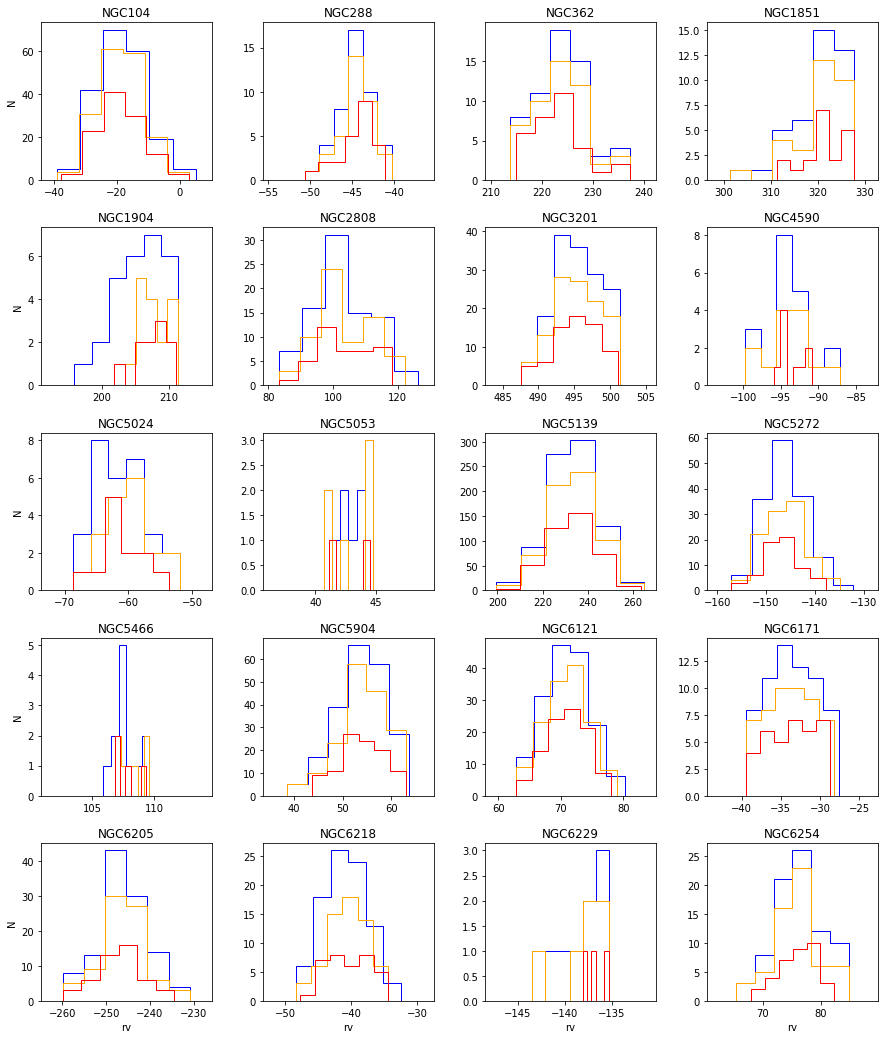

In [104]:
import matplotlib.gridspec as grid
# load in the APOGEE catalogue
apogee2 = fits.open('/Users/qpasa/Desktop/GC_ids/Baumgardt+Harris_selection/Remake_nopms_2sigma/merged.fits')
data2 = apogee2[1].data

fehs = data2.field('FE_H')
sifes = data2.field('SI_FE')

mask = (sifes>-10.)&(fehs>-10.)

data2 = data2[mask]

# # load in the Harris catalog metallicities
# apogee3 = fits.open('/Users/qpasa/Desktop/GC_ids/data/harris+baumgardt.fits')
# data3 = apogee3[1].data

# fehs_H = data3.field('[Fe/H]')
# names_H = data3.field('Name')

# names= ['NGC104','NGC288','NGC362','Whiting1','NGC1261','Pal1','AM1'
# ,'Eridanus','Pal2','NGC1851','NGC1904','NGC2298','NGC2419','Ko2'
# ,'Pyxis','NGC2808','E3','Pal3','NGC3201','Pal4','Ko1','NGC4147'
# ,'NGC4372','Rup106','NGC4590','NGC4833','NGC5024','NGC5053'
# ,'NGC5139','NGC5272','NGC5286','AM4','NGC5466','NGC5634','NGC5694'
# ,'IC4499','NGC5824','Pal5','NGC5897','NGC5904','NGC5927','NGC5946'
# ,'BH176','NGC5986','Lynga7','Pal14','NGC6093','NGC6121','NGC6101'
# ,'NGC6144','NGC6139','Terzan3','NGC6171','1636-283','NGC6205'
# ,'NGC6229','NGC6218','FSR1735','NGC6235','NGC6254','NGC6256'
# ,'Pal15','NGC6266','NGC6273','NGC6284','NGC6287','NGC6293'
# ,'NGC6304','NGC6316','NGC6341','NGC6325','NGC6333','NGC6342'
# ,'NGC6356','NGC6355','','NGC6352','IC1257','Terzan2','NGC6366'
# ,'Terzan4','HP1','NGC6362','Liller1','NGC6380','Terzan1','Ton2'
# ,'NGC6388','NGC6402','NGC6401','NGC6397','Pal6','NGC6426','Djorg1'
# ,'Terzan5','NGC6440','NGC6441','Terzan6','NGC6453','UKS1','NGC6496'
# ,'Terzan9','Djorg2','NGC6517','Terzan10','NGC6522','NGC6535'
# ,'NGC6528','NGC6539','NGC6540','NGC6544','NGC6541','2MS-GC01'
# ,'ESO-SC06','NGC6553','2MS-GC02','NGC6558','IC1276','Terzan12'
# ,'NGC6569','BH261','GLIMPSE02','NGC6584','NGC6624','NGC6626'
# ,'NGC6638','NGC6637','NGC6642','NGC6652','NGC6656','Pal8','NGC6681'
# ,'GLIMPSE01','NGC6712','NGC6715','NGC6717','NGC6723','NGC6749'
# ,'NGC6752','NGC6760','NGC6779','Terzan7','Pal10','Arp2','NGC6809'
# ,'Terzan8','Pal11','NGC6838','NGC6864','NGC6934','NGC6981'
# ,'NGC7006','NGC7078','NGC7089','NGC7099','Pal12','Pal13','NGC7492','Terzan9']
# print(np.shape(names))

# 57 GCs before removing low number members (below 3 members)
# names = ['Rup106', 'NGC6715', 'NGC6517', 'NGC1904', 'NGC6528', 'NGC2808', 'NGC5024', 'NGC6539', 'NGC6316', 'Liller1',
#          'NGC5634', 'NGC7078', 'NGC6171', 'NGC6205', 'NGC6760', 'NGC5053', 'NGC6229', 'NGC6388', 'NGC5904', 'NGC6809',
#          'Terzan2', 'NGC6838', 'UKS1', 'NGC6540', 'NGC4590', 'Terzan1', 'NGC6218', 'NGC5466', 'BH261', 'NGC3201',
#          'NGC6341', 'Terzan4', 'NGC6553', 'NGC5927', 'NGC362', 'NGC4147', 'Terzan5', 'NGC7089', 'NGC6397', 'NGC5139',
#          'NGC6752', 'NGC6544', 'NGC5272', 'NGC6380', 'Pal10', 'NGC6522', 'NGC104', 'Pal6', 'NGC6441', 'NGC1851',
#          'NGC6723', 'Pal5', 'NGC6656', 'NGC6121', 'NGC288', 'HP1', 'NGC6254']

names = [ 'NGC104','NGC288','NGC362','NGC1851','NGC1904','NGC2808','NGC3201','NGC4590','NGC5024','NGC5053',\
        'NGC5139','NGC5272','NGC5466','NGC5904','NGC6121','NGC6171','NGC6205','NGC6218','NGC6229','NGC6254']

# names = [ 'NGC6341','NGC6380','NGC6388','NGC6397','NGC6441','NGC6522','NGC6539','NGC6540','NGC6544','NGC6553',\
#         'NGC6656','NGC6715','NGC6723','NGC6752','NGC6760','NGC6809','NGC6838','NGC7078','NGC7089','Terzan2']
         
# names = [ 'Terzan5','Pal5','Pal6','Pal10','Liller1','HP1']
# names = ['NGC6121']
# check sizes of arrays
print(np.shape(names))
print(np.shape(data2))

# loop through the data and refine our GC sample in APOGEE using the MDF clipping method
fig = plt.figure(constrained_layout=True,figsize=(15,18))
gs = grid.GridSpec(5,4)
# gs = grid.GridSpec(2,4)
p = 0
for i in names:
    if i in data2['gc_name']:
        fehs = data2['FE_H']
        vlos = data2['VHELIO_AVG']
        sifes = data2['SI_FE']
        gc_name = data2['gc_name']
        fehs = fehs[np.where(data2['gc_name']==i)]
        vlos = vlos[np.where(data2['gc_name']==i)]
        sifes = sifes[np.where(data2['gc_name']==i)]
        gc_name = gc_name[np.where(data2['gc_name']==i)]
#         print(np.shape(fehs))
        mean = np.mean(fehs)
        sigma = np.std(fehs)
#         print('old sigma and mean')
#         print(mean,sigma)
        fehs2 = fehs[np.fabs(mean-fehs)<(1.*sigma)]
        vlos2 = vlos[np.fabs(mean-fehs)<(1.*sigma)]
        sifes2 = sifes[np.fabs(mean-fehs)<(1.*sigma)]
        names2 = gc_name[np.fabs(mean-fehs)<(1.*sigma)]
#         print(np.shape(fehs2))
        mean2 = np.mean(fehs2)
        sigma2 = np.std(fehs2)
#         print('new sigma and mean')
#         print(mean2,sigma2)

        fehs3 = fehs2[np.fabs(mean2-fehs2)<=(2.*sigma2)]
        vlos3 = vlos2[np.fabs(mean2-fehs2)<(1.*sigma2)]
        sifes3 = sifes2[np.fabs(mean2-fehs2)<(1.*sigma2)]
        names3 = names2[np.fabs(mean2-fehs2)<(1.*sigma2)]
#         print(gc_name[0])
#         print(np.shape(fehs3))
        mean3 = np.mean(fehs3)
        sigma3 = np.std(fehs3)
        sigma_rvs3 = np.std(vlos3)
#         print(sigma3)
#         print(sigma_rvs3)
#         print('new sigma and mean')
#         print(mean3,sigma3)
#         if len(names3)>0.:
#             print(names3[0])
#             print(np.mean(fehs3))
#             print(np.mean(vlos3))
#             print(np.mean(sifes3))
#         else:
#             pass
#         plt.title(gc_name [0],fontsize=16)
#         plt.hist(fehs,20,range=(-2.5,0.5),histtype='step',color='b',label='Initial Sample')
#         plt.hist(fehs2,20,range=(-2.5,0.5),histtype='step',color='orange',label='1stclip')
#         plt.hist(fehs3,20,range=(-2.5,0.5),histtype='step',color='red',label='2ndclip')
#         plt.title(gc_name[0])
#         plt.hist(vlos,8,histtype='step',color='b',label='Initial Sample')
#         plt.hist(vlos2,8,histtype='step',color='orange',label='1stclip')
#         plt.hist(vlos3,8,histtype='step',color='red',label='2ndclip')
#         plt.legend(loc='upper left')
#         plt.xlim(-1.6,-0.6)
#         plt.xlabel('[Fe/H]]',fontsize=14)
#         plt.legend(loc='upper left')
#         plt.ylabel('N',fontsize=14)
#         plt.show()
        ax = fig.add_subplot(gs[p])
#         ax.hist(fehs,50,range=(-2.5,0.5),histtype='step',color='b',label='Initial Sample')
#         ax.hist(fehs2,50,range=(-2.5,0.5),histtype='step',color='orange',label='1stclip')
#         ax.hist(fehs3,50,range=(-2.5,0.5),histtype='step',color='red',label='2ndclip')        
#         ax.set_xlabel('[Fe/H]]')
#         ax.set_ylabel('N')
#         ax.set_title(gc_name[0])
#         ax.set_xlim(np.min(fehs)-0.2,np.max(fehs)+0.2)
        p+=1
#         ax = fig.add_subplot(gs[p])
        ax.hist(vlos,6,histtype='step',color='b',label='Initial Sample')
        ax.hist(vlos2,6,histtype='step',color='orange',label='1stclip')
        ax.hist(vlos3,6,histtype='step',color='red',label='2ndclip')        
# #         ax.set_xlabel('[Fe/H]]')
# #         ax.set_ylabel('signal')
        plt.title(gc_name[0])
        plt.xlim(np.min(vlos)-5,np.max(vlos)+5)
#         p+=1
#         gs.update(wspace=0.2,hspace=0.5)
axis = fig.axes
# # print(axis)
# axis[0].set(ylabel='N')
# axis[4].set(ylabel='N')
# axis[8].set(ylabel='N')
# axis[12].set(ylabel='N')

# axis[16].set(xlabel='[Fe/H]',ylabel='N')
# axis[17].set(xlabel='[Fe/H]')
# axis[18].set(xlabel='[Fe/H]')
# axis[19].set(xlabel='[Fe/H]')

# gs.update(wspace=0.2,hspace=0.5)
# # axis = fig.axes
# # # print(axis)
# axis[0].set(ylabel='N')
# axis[5].set(ylabel='N')
# # axis[8].set(ylabel='N')
# # axis[12].set(ylabel='N')

# # axis[16].set(xlabel='rv',ylabel='N')
# axis[1].set(xlabel='[Fe/H]')
# axis[2].set(xlabel='[Fe/H]')
# axis[3].set(xlabel='[Fe/H]')
# axis[4].set(xlabel='[Fe/H]')
# axis[5].set(xlabel='[Fe/H]')



axis[0].set(ylabel='N')
axis[4].set(ylabel='N')
axis[8].set(ylabel='N')
axis[12].set(ylabel='N')
axis[16].set(ylabel='N')
axis[0].tick_params(labelsize=10)
axis[4].tick_params(labelsize=10)
axis[5].tick_params(labelsize=10)
axis[1].tick_params(labelsize=10)
axis[2].tick_params(labelsize=10)
axis[3].tick_params(labelsize=10)
axis[5].tick_params(labelsize=10)
axis[6].tick_params(labelsize=10)
axis[7].tick_params(labelsize=10)
axis[9].tick_params(labelsize=10)
axis[10].tick_params(labelsize=10)
axis[11].tick_params(labelsize=10)


axis[16].set(xlabel='rv')
axis[17].set(xlabel='rv')
axis[18].set(xlabel='rv')
axis[19].set(xlabel='rv')
axis[13].tick_params(labelsize=10)
axis[14].tick_params(labelsize=10)
axis[15].tick_params(labelsize=10)
axis[12].tick_params(labelsize=10)
axis[16].tick_params(labelsize=10)
axis[17].tick_params(labelsize=10)
axis[18].tick_params(labelsize=10)
axis[19].tick_params(labelsize=10)

# # axis[0].set(ylabel='N')
# # axis[4].set(ylabel='N')
# # axis[8].set(ylabel='N')
# # axis[12].set(ylabel='N')

# # axis[13].set(xlabel='[Fe/H]',ylabel='N')
# # axis[14].set(xlabel='[Fe/H]')
# # axis[15].set(xlabel='[Fe/H]')
# # axis[12].set(xlabel='[Fe/H]')

gs.update(wspace=0.3,hspace=0.3)
# plt.savefig('/../plots/radvels_batch1', format='pdf', dpi=400, bbox_inches='tight')








In [26]:
apogee2 = fits.open('/Users/qpasa/Desktop/GC_ids/data/GC_final_Baumgardt_selection_nopms')
data2 = apogee2[1].data



In [31]:
# store the ones not needing a clip
names2 = ['NGC6715','Terzan5','NGC5139','NGC5053','Terzan2','NGC7089','Pal5','NGC6723']
        
for i in names2:
    if i in data2['gc_name']:
        fehs = data2['FE_H']
        sifes = data2['SI_FE']
        gc_name = data2['gc_name']
        vlos = data2['VHELIO_AVG']
        apo_ids = data2['APOGEE_ID']
        fehs = fehs[np.where(data2['gc_name']==i)]
        vlos = vlos[np.where(data2['gc_name']==i)]
        sifes = sifes[np.where(data2['gc_name']==i)]
        gc_name = gc_name[np.where(data2['gc_name']==i)]
        apo_ids = apo_ids[np.where(data2['gc_name']==i)]
        print(gc_name[0])
#         print(np.mean(fehs),np.std(fehs))
#         print(np.mean(vlos),np.std(vlos))
        print(np.mean(sifes),np.std(sifes))
#         rec = np.recarray(len(apo_ids), dtype=[('apogee_id',object),
#                                             ('name', object)])
#         rec['apogee_id'] = apo_ids
#         rec['name'] = gc_name
#         np.savetxt('/Users/qpasa/Desktop/GC_ids/Baumgardt+Harris_selection/Remake_nopms_2sigma_final/'+i+'.txt',rec,fmt='%s')


NGC6715
-0.10244373 0.12204653
Terzan5
0.07763625 0.112892136
NGC5139
0.27067345 0.08753364
NGC5053
0.38360196 0.096024245
Terzan2
0.2608395 0.015363813
NGC7089
0.18932126 0.06684162
Pal5
0.109905325 0.038576193
NGC6723
0.24791911 0.032349326


In [692]:
# get all the GCs we clip once
names3 = ['NGC2808','NGC7078','NGC6171','NGC6760','NGC6809','NGC4590','NGC3201','NGC6341','NGC362',\
          'NGC6397','NGC6752','NGC288','NGC6254','NGC6121','NGC6656']

for i in names3:
    if i in data2['gc_name']:
        fehs = data2['FE_H']
        sifes = data2['SI_FE']
        gc_name = data2['gc_name']
        vlos = data2['VHELIO_AVG']
        apo_ids = data2['APOGEE_ID']
        fehs = fehs[np.where(data2['gc_name']==i)]
        vlos = vlos[np.where(data2['gc_name']==i)]
        sifes = sifes[np.where(data2['gc_name']==i)]
        gc_name = gc_name[np.where(data2['gc_name']==i)]
        apo_ids = apo_ids[np.where(data2['gc_name']==i)]
#         print(np.shape(fehs))
        mean = np.mean(fehs)
        sigma = np.std(fehs)
#         print('old sigma and mean')
#         print(mean,sigma)
        fehs2 = fehs[np.fabs(mean-fehs)<(1.*sigma)]
        gc_name2 = gc_name[np.fabs(mean-fehs)<(1.*sigma)]
        apo_ids2 = apo_ids[np.fabs(mean-fehs)<(1.*sigma)]
        vlos2 = vlos[np.fabs(mean-fehs)<(1.*sigma)]
        sifes2 = sifes[np.fabs(mean-fehs)<(1.*sigma)]
#         print(np.shape(fehs2))
        mean2 = np.mean(fehs2)
        sigma2 = np.std(fehs2)
#         print('new sigma and mean')
#         print(mean2,sigma2)
        print(gc_name2[0])
#         print(np.mean(fehs2),np.std(fehs2))
#         print(np.mean(vlos2),np.std(vlos2))
        print(np.mean(sifes2),np.std(sifes2))

#         rec = np.recarray(len(apo_ids2), dtype=[('apogee_id',object),
#                                             ('name', object)])
#         rec['apogee_id'] = apo_ids2
#         rec['name'] = gc_name2
#         np.savetxt('/Users/qpasa/Desktop/GC_ids/Baumgardt+Harris_selection/Remake_nopms_2sigma_final/'+i+'.txt',rec,fmt='%s')



NGC2808
0.15124919 0.055898998
NGC7078
0.31229672 0.07052934
NGC6171
0.3185428 0.07711292
NGC6760
0.18952344 0.04873649
NGC6809
0.22495605 0.050702453
NGC4590
0.33110046 0.04538027
NGC3201
0.15754892 0.04089314
NGC6341
0.31392902 0.067816176
NGC362
0.1267355 0.043072235
NGC6397
0.30331156 0.05639547
NGC6752
0.23549604 0.04928271
NGC288
0.2976249 0.03431226
NGC6254
0.26791912 0.047183733
NGC6121
0.33981487 0.04055069
NGC6656
0.2882283 0.11043721


In [693]:
# get all the GCs we clip twice
# names4 = ['NGC104','NGC1851','NGC1904','NGC4147','NGC5024','NGC5053','NGC5272','NGC6121','NGC6205','NGC6229',\
#          'NGC6218','NGC6341','Terzan4','Liller1','Terzan4','Liller1','NGC6388','Pal6',\
#          'NGC6441','UKS1','Terzan9','NGC6522','NGC6539','NGC6540','NGC6553','NGC6656',\
#          'NGC6715','NGC6723','NGC6760','NGC6838','NGC7089']

names4 = ['NGC1904','NGC5024','NGC6539','Liller1','NGC6205','NGC6229','NGC5904','NGC6838','NGC6388',\
         'NGC6540','NGC6218','NGC5466','NGC6553','NGC6544','NGC104','NGC6522','Pal10','NGC6380',\
        'NGC5272','Pal6','NGC6441','NGC1851','HP1']

for i in names4:
    if i in data2['gc_name']:
        fehs = data2['FE_H']
        sifes = data2['SI_FE']
        gc_name = data2['gc_name']
        vlos = data2['VHELIO_AVG']
        apo_ids = data2['APOGEE_ID']
        fehs = fehs[np.where(data2['gc_name']==i)]
        vlos = vlos[np.where(data2['gc_name']==i)]
        sifes = sifes[np.where(data2['gc_name']==i)]
        gc_name = gc_name[np.where(data2['gc_name']==i)]
        apo_ids = apo_ids[np.where(data2['gc_name']==i)]
#         print(np.shape(fehs))
        mean = np.mean(fehs)
        sigma = np.std(fehs)
#         print('old sigma and mean')
#         print(mean,sigma)
        fehs2 = fehs[np.fabs(mean-fehs)<(1.*sigma)]
        gc_name2 = gc_name[np.fabs(mean-fehs)<(1.*sigma)]
        apo_ids2 = apo_ids[np.fabs(mean-fehs)<(1.*sigma)]
        vlos2 = vlos[np.fabs(mean-fehs)<(1.*sigma)]
        sifes2 = sifes[np.fabs(mean-fehs)<(1.*sigma)]
#         print(np.shape(fehs2))
        mean2 = np.mean(fehs2)
        sigma2 = np.std(fehs2)
#         print('new sigma and mean')
#         print(mean2,sigma2)
        fehs3 = fehs2[np.fabs(mean2-fehs2)<=(2.*sigma2)]
        gc_name3 = gc_name2[np.fabs(mean2-fehs2)<(2.*sigma2)]
        apo_ids3 = apo_ids2[np.fabs(mean2-fehs2)<(2.*sigma2)]
        vlos3 = vlos2[np.fabs(mean2-fehs2)<(2.*sigma2)]
        sifes3 = sifes2[np.fabs(mean2-fehs2)<(2.*sigma2)]
#         print(np.shape(fehs3))
        mean3 = np.mean(fehs3)
        sigma3 = np.std(fehs3)
#         print('new sigma and mean')
#         print(mean3,sigma3)
        print(gc_name3[0])
#         print(np.mean(fehs3),np.std(fehs3))
#         print(np.mean(vlos3),np.std(vlos3))
        print(np.mean(sifes3),np.std(sifes3))
        
#         rec = np.recarray(len(apo_ids3), dtype=[('apogee_id',object),
#                                         ('name', object)])
#         rec['apogee_id'] = apo_ids3
#         rec['name'] = gc_name3
#         np.savetxt('/Users/qpasa/Desktop/GC_ids/Baumgardt+Harris_selection/Remake_nopms_2sigma_final/'+i+'.txt',rec,fmt='%s')





NGC1904
0.14947347 0.042943053
NGC5024
0.24579869 0.078967236
NGC6539
0.20449032 0.07167215
Liller1
0.013930501 0.04957019
NGC6205
0.20605776 0.06906504
NGC6229
0.19291033 0.06119332
NGC5904
0.18383262 0.04903543
NGC6838
0.21550794 0.03032711
NGC6388
-0.034527283 0.100034505
NGC6540
0.21175203 0.035701722
NGC6218
0.25535008 0.0486344
NGC5466
0.18742181 0.12082274
NGC6553
0.09009069 0.069752045
NGC6544
0.21968442 0.04425401
NGC104
0.23388414 0.04042804
NGC6522
0.21539032 0.10256777
Pal10
-0.0037310019 0.012507817
NGC6380
0.20551798 0.021878285
NGC5272
0.16689894 0.071403004
Pal6
0.277548 0.07498644
NGC6441
0.13213976 0.13272859
NGC1851
0.1426886 0.05008682
HP1
0.21502952 0.06099403


In [649]:
print(np.shape(names4))
print(np.shape(names3))
print(np.shape(names2))


(23,)
(15,)
(8,)


In [650]:
# saved the clipped sample
import glob
import sys
files = glob.glob("/Users/qpasa/Desktop/GC_ids/Baumgardt+Harris_selection/Remake_nopms_2sigma_final/*.txt")
# print(np.shape(files))

complete2=[]
for i in files:
    file = np.array(np.loadtxt(i,dtype='str'))
    complete2.extend(file)
    

In [651]:
# save the full clipped sample together in one file
print(np.shape(complete2))
np.savetxt('/Users/qpasa/Desktop/GC_ids/Baumgardt+Harris_selection/Remake_nopms_2sigma_final/complete2.txt',complete2,fmt='%s')



(3090, 2)
